# Midterm project of machine learning zoom camp

Data from https://www.kaggle.com/shivan118/churn-modeling-dataset

### 1.1 Business Problem


**In this project, we will play with data from one of the banks. This data set contains details of a bank's customers. The target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. So we will create models to accomplish this, and then we will select the best model with the highest accuracy.**


### 1.2 Data preparation


In [1]:
import pandas as pd
import numpy as np 


import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

from sklearn.ensemble import RandomForestClassifier


! pip install xgboost


import xgboost as xgb


In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_b513d501b0314f9ca0a4b43814f413b8 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_b513d501b0314f9ca0a4b43814f413b8 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_b513d501b0314f9ca0a4b43814f413b8 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='QzyMwuqEgykPxvDFxI8Fs1uE1jjFlchMleAAvNmFK07q',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_b513d501b0314f9ca0a4b43814f413b8)

body = client_b513d501b0314f9ca0a4b43814f413b8.get_object(Bucket='coursemlzoomcamp-donotdelete-pr-u0vglgqkbod79i',Key='Churn_Modelling.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df = df_data_3

In [5]:
df.columns = df.columns.str.lower()

In [6]:
objects = list(df.dtypes[df.dtypes == "object"].index)

In [7]:
for col in objects:
    df[col] = df[col].str.lower()


In [8]:
df

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,hargrave,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,hill,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,onio,502,france,female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,boni,699,france,female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,mitchell,850,spain,female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,obijiaku,771,france,male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,johnstone,516,france,male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,liu,709,france,female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,sabbatini,772,germany,male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
del df["rownumber"]
del df["surname"]

In [10]:
df.head()

,customerid,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,15634602,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,france,female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,france,female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,spain,female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.isnull().sum()

customerid         0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

 ### 1.3 Exploratory data analysis (EDA)


In [12]:
df.describe().round(2)

,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [13]:
for c in ["geography","gender","age"]:
    print(c)
    print(df[c].unique())
    print(df[c].nunique())

geography
['france' 'spain' 'germany']
3
gender
['female' 'male']
2
age
[42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
70


<AxesSubplot:xlabel='age', ylabel='Count'>

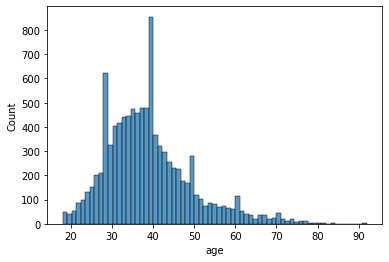

In [14]:
sns.histplot(df.age)

<AxesSubplot:xlabel='age', ylabel='Count'>

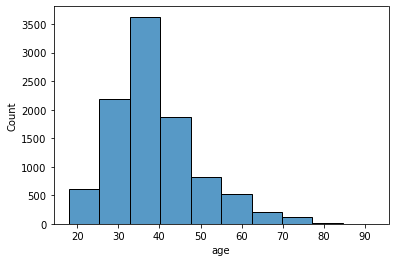

In [15]:
sns.histplot(df.age,bins = 10)

<AxesSubplot:xlabel='geography', ylabel='Count'>

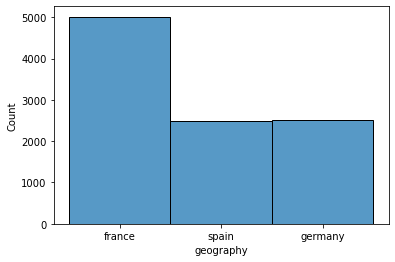

In [16]:
sns.histplot(df.geography)

In [17]:
df.geography.value_counts()

france     5014
germany    2509
spain      2477
Name: geography, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='Count'>

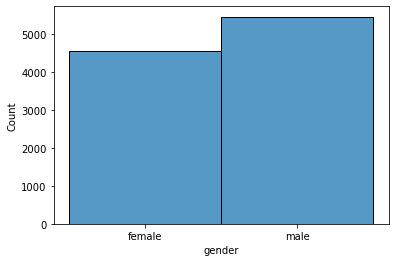

In [18]:
sns.histplot(df.gender)

In [19]:
df.gender.value_counts()

male      5457
female    4543
Name: gender, dtype: int64

<AxesSubplot:xlabel='hascrcard', ylabel='Count'>

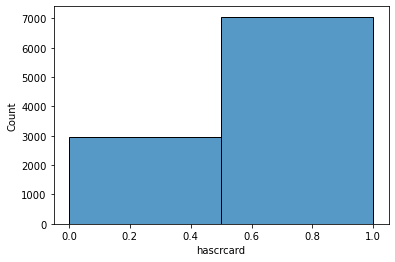

In [20]:
sns.histplot(df.hascrcard,bins = 2)

In [21]:
df.hascrcard.value_counts()

1    7055
0    2945
Name: hascrcard, dtype: int64

<AxesSubplot:xlabel='numofproducts', ylabel='Count'>

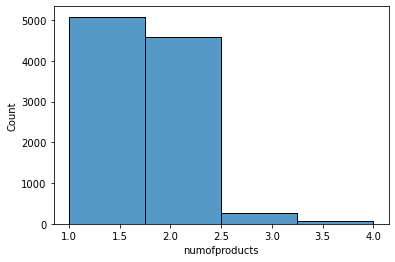

In [22]:
sns.histplot(df.numofproducts,bins = 4)

In [23]:
df.numofproducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: numofproducts, dtype: int64

### 1.4.1 decision tree model


In [24]:
df_full_train, df_test = train_test_split(df , test_size = 0.2, random_state = 1 )

In [25]:
df_train , df_val = train_test_split(df_full_train,test_size = 0.25, random_state = 11)

In [26]:
len(df_train),len(df_val),len(df_test)

(6000, 2000, 2000)

In [27]:
y_train  = df_train.exited.values
y_val = df_val.exited.values
y_test= df_test.exited.values

del df_train["exited"]
del df_val["exited"]
del df_test["exited"]

In [28]:
dv = DictVectorizer(sparse=False)

In [29]:
train_dicts = df_train.to_dict(orient = 'records' )
x_train = dv.fit_transform(train_dicts)


In [30]:
val_dicts = df_val.to_dict(orient = 'records' )
x_val = dv.transform(val_dicts)

In [31]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
y_pred = dt.predict_proba(x_val)[:,1]

In [33]:
roc_auc_score(y_val,y_pred)

0.6761858853068556

### 1.4.2 Decision tree parameter tuning

In [34]:
depths = [1,2,3,4,5,6,7,8,9,10]
for depth in depths:
    dt = DecisionTreeClassifier(max_depth = depth, random_state = 1)
    dt.fit(x_train,y_train)
    
    y_pred = dt.predict_proba(x_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    print("depth : ", depth,"auc : ",auc)

depth :  1 auc :  0.6808306152727972
depth :  2 auc :  0.7273822824500388
depth :  3 auc :  0.7775905669784177
depth :  4 auc :  0.8021950215943152
depth :  5 auc :  0.8214594633557385
depth :  6 auc :  0.8224212963797236
depth :  7 auc :  0.8095533070237088
depth :  8 auc :  0.7951152998276059
depth :  9 auc :  0.7776356177055364
depth :  10 auc :  0.7404289730236246


***Best depths is (5,6)***

In [35]:
depths = [5,6]
sml = [1,5,8,10,25,50,100,200]
for depth in depths:
    for s in sml:

        dt = DecisionTreeClassifier(max_depth = depth,min_samples_leaf = s, random_state = 1)
        dt.fit(x_train,y_train)
    
        y_pred = dt.predict_proba(x_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        
        print("depth:",depth, "min_samples_leaf:",s,"(auc) : ",auc.round(5))

depth: 5 min_samples_leaf: 1 (auc) :  0.82146
depth: 5 min_samples_leaf: 5 (auc) :  0.82108
depth: 5 min_samples_leaf: 8 (auc) :  0.82105
depth: 5 min_samples_leaf: 10 (auc) :  0.82107
depth: 5 min_samples_leaf: 25 (auc) :  0.81652
depth: 5 min_samples_leaf: 50 (auc) :  0.80719
depth: 5 min_samples_leaf: 100 (auc) :  0.80792
depth: 5 min_samples_leaf: 200 (auc) :  0.79117
depth: 6 min_samples_leaf: 1 (auc) :  0.82242
depth: 6 min_samples_leaf: 5 (auc) :  0.82553
depth: 6 min_samples_leaf: 8 (auc) :  0.82619
depth: 6 min_samples_leaf: 10 (auc) :  0.82636
depth: 6 min_samples_leaf: 25 (auc) :  0.82093
depth: 6 min_samples_leaf: 50 (auc) :  0.81425
depth: 6 min_samples_leaf: 100 (auc) :  0.81272
depth: 6 min_samples_leaf: 200 (auc) :  0.79262


***Best min_samples_leaf is 10***

#### *'AUC for the best decision tree model = 0.826'*

### 1.5.1 random forest model


In [36]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
y_pred = rf.predict_proba(x_val)[:,1]
roc_auc_score(y_val,y_pred )

0.8375688525279466

### 1.5.2 random forest parameter tuning


In [38]:
n = [10,50,100,150,200,250,500,600,700,1000]
for rfc in n:
    rf = RandomForestClassifier(n_estimators = rfc, random_state = 1)
    rf.fit(x_train, y_train)
    
    y_pred = rf.predict_proba(x_val)[:,1]
    auc = roc_auc_score(y_val,y_pred )
    
    print("rfc:", rfc, "auc:", auc)


rfc: 10 auc: 0.8096636813051497
rfc: 50 auc: 0.8300401251809537
rfc: 100 auc: 0.8374246902011664
rfc: 150 auc: 0.8404528499089976
rfc: 200 auc: 0.8402748995368785
rfc: 250 auc: 0.8415573435688585
rfc: 500 auc: 0.8432850389538622
rfc: 600 auc: 0.8438188900702189
rfc: 700 auc: 0.8433864030898792
rfc: 1000 auc: 0.8431176004180707


***Best n_estimators are (100 ,150 ,200 )***

In [39]:
n = [100 ,150 ,200]
depths = [1,2,3,4,5,6,7,8,9,10]

for rfc in n:
    for depth in depths:
        rf = RandomForestClassifier(n_estimators = rfc,max_depth = depth, random_state = 1)
        rf.fit(x_train, y_train)
    
        y_pred = rf.predict_proba(x_val)[:,1]
        auc = roc_auc_score(y_val,y_pred )
    
        print("rfc:", rfc, "max_depth:", depth, "auc:", auc)


rfc: 100 max_depth: 1 auc: 0.7991270670775292
rfc: 100 max_depth: 2 auc: 0.8101074309672692
rfc: 100 max_depth: 3 auc: 0.8220165906811069
rfc: 100 max_depth: 4 auc: 0.8335811123324863
rfc: 100 max_depth: 5 auc: 0.836729407312634
rfc: 100 max_depth: 6 auc: 0.8433796454808113
rfc: 100 max_depth: 7 auc: 0.8454624907646009
rfc: 100 max_depth: 8 auc: 0.8470647949591239
rfc: 100 max_depth: 9 auc: 0.8469686867412706
rfc: 100 max_depth: 10 auc: 0.8494479784237052
rfc: 150 max_depth: 1 auc: 0.7947316178016447
rfc: 150 max_depth: 2 auc: 0.8078188540296374
rfc: 150 max_depth: 3 auc: 0.8243171811459704
rfc: 150 max_depth: 4 auc: 0.8331388643612709
rfc: 150 max_depth: 5 auc: 0.838694369860463
rfc: 150 max_depth: 6 auc: 0.843926260969852
rfc: 150 max_depth: 7 auc: 0.8479613044287868
rfc: 150 max_depth: 8 auc: 0.8485679875539857
rfc: 150 max_depth: 9 auc: 0.8484358387544375
rfc: 150 max_depth: 10 auc: 0.8512229770721833
rfc: 200 max_depth: 1 auc: 0.7954802107172676
rfc: 200 max_depth: 2 auc: 0.810276

***I think that the best model is with n_estimators = 100 and max_depth 8***

"note" I didn't choose those (rfc: 200 max_depth: 9 auc: 0.8500576649307119 ///
rfc: 200 max_depth: 10 auc: 0.8525279464677226)

becouse the n_estimators is too big (200) and max_depth is so deep with (9,10)

In [40]:
n = [100]
depths = [1,2,3,4,5,6,7,8,9,10]
sml = [1,5,8,10,25,50,100,200]

for rfc in n:
    for depth in depths:
        for s in sml:
            rf = RandomForestClassifier(n_estimators = rfc,max_depth = depth,min_samples_leaf = s, random_state = 1)
            rf.fit(x_train, y_train)
    
            y_pred = rf.predict_proba(x_val)[:,1]
            auc = roc_auc_score(y_val,y_pred )
    
            print("rfc:", rfc, "max_depth:", depth,"min_samples_leaf:", s , "auc:", auc)


rfc: 100 max_depth: 1 min_samples_leaf: 1 auc: 0.7991270670775292
rfc: 100 max_depth: 1 min_samples_leaf: 5 auc: 0.7991270670775292
rfc: 100 max_depth: 1 min_samples_leaf: 8 auc: 0.7991270670775292
rfc: 100 max_depth: 1 min_samples_leaf: 10 auc: 0.7989483658599582
rfc: 100 max_depth: 1 min_samples_leaf: 25 auc: 0.7968520053580332
rfc: 100 max_depth: 1 min_samples_leaf: 50 auc: 0.7968520053580332
rfc: 100 max_depth: 1 min_samples_leaf: 100 auc: 0.7964240234504052
rfc: 100 max_depth: 1 min_samples_leaf: 200 auc: 0.7816181019828328
rfc: 100 max_depth: 2 min_samples_leaf: 1 auc: 0.8101074309672692
rfc: 100 max_depth: 2 min_samples_leaf: 5 auc: 0.8100466124856589
rfc: 100 max_depth: 2 min_samples_leaf: 8 auc: 0.8096636813051497
rfc: 100 max_depth: 2 min_samples_leaf: 10 auc: 0.8088963172532271
rfc: 100 max_depth: 2 min_samples_leaf: 25 auc: 0.8072114200589864
rfc: 100 max_depth: 2 min_samples_leaf: 50 auc: 0.8088377513079728
rfc: 100 max_depth: 2 min_samples_leaf: 100 auc: 0.816165252073835

***I think that the best model is with n_estimators = 100 , max_depth = 8 and min_samples_leaf = 5***


#### *'AUC for the best  random forest model = 0.84'*

### 1.6.1 Gradient boosting and XGBoost


In [41]:
fetures = dv.get_feature_names()


In [42]:
dtrain = xgb.DMatrix( x_train , label = y_train , feature_names = fetures)
dval = xgb.DMatrix( x_val , label = y_val , feature_names = fetures)

In [43]:
params ={"eta":0.3,
    "max_depth":6,
    "mean_child_weight":1,
    
    "obejective":"binary:logustic",
    "nthread":8,
    
    "seed":1,
    "verbosity":1,}

model = xgb.train(params,dtrain,num_boost_round = 10)

[17:58:11] WARNING: /opt/conda/conda-bld/xgboost-base_1628832676711/work/src/learner.cc:541: 
Parameters: { mean_child_weight, obejective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [44]:
y_pred = model.predict(dval)
y_pred

array([0.21341218, 0.04752786, 0.2915861 , ..., 0.18721043, 0.04598323,
       0.07054549], dtype=float32)

In [45]:
roc_auc_score(y_val,y_pred)

0.8504068080658822

In [46]:
watchlist = [(dtrain,"train"),(dval,"val")]

In [47]:
xgb_params = {
    "eta":0.3,
    "max_depth":6,
    "mean_child_weight":1,
    
    "obejective":"binary:logustic",
    "eval_metric":"auc",
    "nthread":8,
    
    "seed":1,
    "verbosity":1,
        
                }
model = xgb.train(xgb_params, dtrain, num_boost_round = 200,evals =watchlist, verbose_eval = 5)

[17:58:11] WARNING: /opt/conda/conda-bld/xgboost-base_1628832676711/work/src/learner.cc:541: 
Parameters: { mean_child_weight, obejective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.86686	val-auc:0.82288
[5]	train-auc:0.90372	val-auc:0.84702
[10]	train-auc:0.91953	val-auc:0.84687
[15]	train-auc:0.93487	val-auc:0.84601
[20]	train-auc:0.94615	val-auc:0.84197
[25]	train-auc:0.95771	val-auc:0.84405
[30]	train-auc:0.96286	val-auc:0.84467
[35]	train-auc:0.97003	val-auc:0.84286
[40]	train-auc:0.97691	val-auc:0.83825
[45]	train-auc:0.98097	val-auc:0.83489
[50]	train-auc:0.98442	val-auc:0.82943
[55]	train-auc:0.98810	val-auc:0.82628
[60]	train-auc:0.98955	val-auc:0.82150
[65]	train-auc:0.99094	val-auc:0.82086
[70]	train-auc:0.99307	val-auc:0.81816
[75]	train-auc:0.9

### 1.6.2  XGBoost parameter tuning


In [48]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [49]:
scores = {}


In [72]:
%%capture output

xgb_params = {
    'eta':1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [73]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1'

In [74]:
scores.keys()


dict_keys(['eta=0.4', 'eta=0.01', 'eta=0.1', 'eta=0.3', 'eta=1'])

In [75]:
df_score = parse_xgb_output(output)


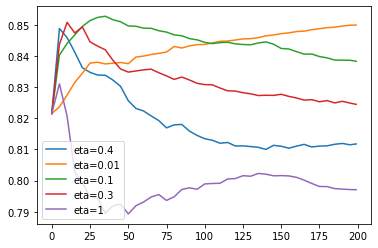

In [76]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

plt.legend()


***As we see the best eta is 0.1***

In [101]:
%%capture output

xgb_params = {
    'eta':0.1, 
    'max_depth': 1,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [102]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=1'

In [103]:
scores.keys()


dict_keys(['eta=0.4', 'eta=0.01', 'eta=0.1', 'eta=0.3', 'eta=1', 'max_depth=10', 'max_depth=9', 'max_depth=8', 'max_depth=6', 'max_depth=5', 'max_depth=4', 'max_depth=3', 'max_depth=2', 'max_depth=1'])

In [104]:
del scores['eta=1']
del scores['eta=0.01']
del scores['eta=0.1']
del scores['eta=0.3']
del scores['eta=0.4']



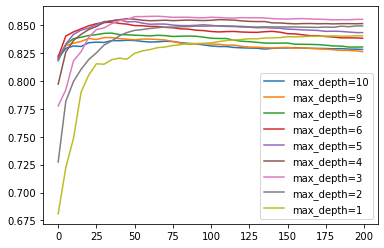

In [105]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.legend()


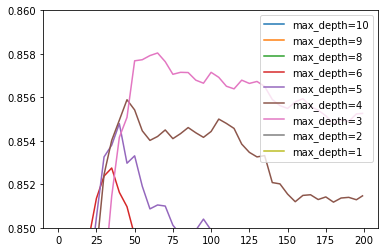

In [107]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
    
plt.ylim(0.85, 0.86)
plt.legend()


***As we see the best max_depth is 3***

In [120]:
%%capture output

xgb_params = {
    'eta':0.1, 
    'max_depth': 3,
    'min_child_weight': 200,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [121]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=200'

In [122]:
scores.keys()


dict_keys(['max_depth=10', 'max_depth=9', 'max_depth=8', 'max_depth=6', 'max_depth=5', 'max_depth=4', 'max_depth=3', 'max_depth=2', 'max_depth=1', 'min_child_weight=10', 'min_child_weight=50', 'min_child_weight=100', 'min_child_weight=150', 'min_child_weight=200'])

In [123]:
del scores['max_depth=1']
del scores['max_depth=2']
del scores['max_depth=3']
del scores['max_depth=4']
del scores['max_depth=5']
del scores['max_depth=6']
del scores['max_depth=8']
del scores['max_depth=9']
del scores['max_depth=10']


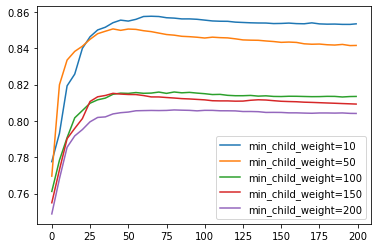

In [124]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.legend()


***Best min_child_weight is 10***

In [125]:
xgb_params = {
    'eta':0.1, 
    'max_depth': 3,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.79850	val-auc:0.77759
[5]	train-auc:0.81005	val-auc:0.79315
[10]	train-auc:0.83033	val-auc:0.81933
[15]	train-auc:0.83985	val-auc:0.82579
[20]	train-auc:0.85164	val-auc:0.83994
[25]	train-auc:0.85757	val-auc:0.84634
[30]	train-auc:0.86271	val-auc:0.85010
[35]	train-auc:0.86619	val-auc:0.85159
[40]	train-auc:0.86972	val-auc:0.85407
[45]	train-auc:0.87263	val-auc:0.85550
[50]	train-auc:0.87429	val-auc:0.85497
[55]	train-auc:0.87672	val-auc:0.85594
[60]	train-auc:0.88004	val-auc:0.85750
[65]	train-auc:0.88123	val-auc:0.85764
[70]	train-auc:0.88247	val-auc:0.85749
[75]	train-auc:0.88366	val-auc:0.85682
[80]	train-auc:0.88448	val-auc:0.85661
[85]	train-auc:0.88575	val-auc:0.85617
[90]	train-auc:0.88672	val-auc:0.85618
[95]	train-auc:0.88797	val-auc:0.85596
[100]	train-auc:0.88884	val-auc:0.85551
[105]	train-auc:0.88967	val-auc:0.85505
[110]	train-auc:0.89049	val-auc:0.85489
[115]	train-auc:0.89172	val-auc:0.85485
[120]	train-auc:0.89296	val-auc:0.85440
[125]	train-auc:0.8938

***Best num_boost_round is 60***

#### *'AUC for the best Gradient boosting model = 0.857'*

### 1.7  Best model


As we see the best model is Gradient boosting model 

In [132]:
xgb_params = {
    'eta':0.1, 
    'max_depth': 3,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=60,
                  verbose_eval=5,
                  )

In [133]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)


0.8576825004955579

let's see the auc of our model with test data

In [134]:
test_dicts = df_test.to_dict(orient = 'records')
x_test = dv.transform(test_dicts)
dtest= xgb.DMatrix(x_test, label = y_test , feature_names = fetures)

In [135]:
y_pred = xgb_model.predict(dtest)
roc_auc_score(y_test, y_pred)


0.8789023602295618

#### *Wow it 's great*

### 1.8 Saving and Loading the Model


In [144]:
import pickle

In [159]:
with open("model_pickle","wb")as f_out:
    pickle.dump((dv,xgb_model),f_out)

In [160]:
with open("model_pickle","rb")as f_out:
    dv, model = pickle.load(f_out)

We can use model now again

In [161]:
# we will take the first customer in df just as an example
customer = df.iloc[0].to_dict()

In [166]:
x = dv.transform(customer)


In [175]:
dx = xgb.DMatrix(x,feature_names = fetures)


In [179]:
model.predict(dx)

array([0.2655728], dtype=float32)

In [176]:
# This is our model before we save it
xgb_model.predict(dx)

array([0.2655728], dtype=float32)

# Thanks